In [1]:
import os
import copy
import numpy as np
import networkx as nx

from datetime import datetime
import matplotlib.pyplot as plt 
from tqdm import tqdm

import scipy
from scipy.sparse.linalg import eigsh

from init_graph import *
import peeling
import utils
import LL_optimization

In [3]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

plt.rcParams["figure.dpi"]=100
plt.rcParams['savefig.dpi']=300

sns.set_theme(style="whitegrid")
sns.set_style({"axes.facecolor": ".98"})

colors = sns.color_palette("muted", 7)
# markers = ['o','s','p','^','<','>','v','P','X']


In [ ]:
save_source_path = "/figures/"
save_=0

In [ ]:
dataset_name = "github"
# dataset_name = "caidaRouterLevel"
# dataset_name = "web-Stanford"

# dataset_name = "deezer"
# dataset_name = "lastfm"

source_path = "datasets/"
G = init_graph(dataset_name, source_path)

In [5]:
print(G)
n = G.number_of_nodes()
m = G.number_of_edges()

Graph with 192244 nodes and 609066 edges


In [ ]:
logs_save_path = "/logs/"

In [ ]:
alpha_ = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
# alpha_ = [0.6, 0.7, 0.8, 0.9, 0.93, 0.95, 0.97]

In [9]:
max_iters = 20
initialization='S_oh'
density_type='avg_deg'

In [10]:
dir_path = logs_save_path+dataset_name+'/'

result_ = []
fun_values_vec_ = []
is_binary_vec_ = []
selected_nodes_ = []
OQC_density_ = []
avg_deg_density_ = []
num_of_nodes_ = []
x0_ = []
GreedyOQC_indicator_ = []
GreedyOQC_density_ = []
delta_vec_ = []
GreedyOQC_delta_ = []
error_from_binary_ = []
for alpha in alpha_:
    load_path = dir_path+dataset_name+'_alpha'+'{:.2f}'.format(alpha)
    load_path = load_path+'_'+initialization
    if initialization=='S_oh':
        load_path = load_path+'_'+density_type
    load_path = load_path + '_iters'+str(max_iters)+'_log.npy'

    variables_dict = np.load(load_path, allow_pickle=True)

    result = variables_dict.item().get('result')
    fun_values_ = variables_dict.item().get('fun_values_')
    is_binary_ = variables_dict.item().get('is_binary_')
    selected_nodes = variables_dict.item().get('selected_nodes')
    OQC_density = variables_dict.item().get('OQC_density')
    avg_deg_density = variables_dict.item().get('avg_deg_density')
    num_of_nodes = variables_dict.item().get('num_of_nodes')
    x0 = variables_dict.item().get('x0')
    GreedyOQC_indicator = variables_dict.item().get('GreedyOQC_indicator')
    GreedyOQC_density = variables_dict.item().get('GreedyOQC_density')
    
    result_.append(result)
    fun_values_vec_.append(fun_values_)
    is_binary_vec_.append(is_binary_)
    selected_nodes_.append(selected_nodes)
    OQC_density_.append(OQC_density)
    avg_deg_density_.append(avg_deg_density)
    num_of_nodes_.append(num_of_nodes)
    x0_.append(x0)
    GreedyOQC_indicator_.append(GreedyOQC_indicator)
    GreedyOQC_density_.append(GreedyOQC_density)

    delta_ = np.minimum(1, np.array(fun_values_) / (num_of_nodes*(num_of_nodes-1)/2) + alpha)
    delta_vec_.append(delta_)

    GreedyOQC_num_of_nodes = GreedyOQC_indicator.sum().item()
    GreedyOQC_delta = GreedyOQC_density / (GreedyOQC_num_of_nodes*(GreedyOQC_num_of_nodes-1)/2) + alpha
    GreedyOQC_delta_.append(GreedyOQC_delta)

    error_from_binary_.append(utils.error_from_binary(result.x, n))

In [11]:
max_iters = 20
initialization_2='S_greedy'
density_type_2='avg_deg'

In [12]:
dir_path = logs_save_path+dataset_name+'/'

result_2_ = []
fun_values_vec_2_ = []
is_binary_vec_2_ = []
selected_nodes_2_ = []
OQC_density_2_ = []
avg_deg_density_2_ = []
num_of_nodes_2_ = []
x0_2_ = []
GreedyOQC_indicator_2_ = []
GreedyOQC_density_2_ = []
delta_2_vec_ = []
GreedyOQC_delta_2_ = []
error_from_binary_2_ = []
for alpha in alpha_:
    load_path = dir_path+dataset_name+'_alpha'+'{:.2f}'.format(alpha)
    load_path = load_path+'_'+initialization_2
    if initialization_2=='S_oh':
        load_path = load_path+'_'+density_type_2
    load_path = load_path + '_iters'+str(max_iters)+'_log.npy'

    variables_dict = np.load(load_path, allow_pickle=True)

    result = variables_dict.item().get('result')
    fun_values_ = variables_dict.item().get('fun_values_')
    is_binary_ = variables_dict.item().get('is_binary_')
    selected_nodes = variables_dict.item().get('selected_nodes')
    OQC_density = variables_dict.item().get('OQC_density')
    avg_deg_density = variables_dict.item().get('avg_deg_density')
    num_of_nodes = variables_dict.item().get('num_of_nodes')
    x0 = variables_dict.item().get('x0')
    GreedyOQC_indicator = variables_dict.item().get('GreedyOQC_indicator')
    GreedyOQC_density = variables_dict.item().get('GreedyOQC_density')
    
    result_2_.append(result)
    fun_values_vec_2_.append(fun_values_)
    is_binary_vec_2_.append(is_binary_)
    selected_nodes_2_.append(selected_nodes)
    OQC_density_2_.append(OQC_density)
    avg_deg_density_2_.append(avg_deg_density)
    num_of_nodes_2_.append(num_of_nodes)
    x0_2_.append(x0)
    GreedyOQC_indicator_2_.append(GreedyOQC_indicator)
    GreedyOQC_density_2_.append(GreedyOQC_density)

    delta_2_ = np.minimum(1, np.array(fun_values_) / (num_of_nodes*(num_of_nodes-1)/2) + alpha)
    delta_2_vec_.append(delta_2_)

    GreedyOQC_num_of_nodes = GreedyOQC_indicator.sum().item()
    GreedyOQC_delta_2 = GreedyOQC_density / (GreedyOQC_num_of_nodes*(GreedyOQC_num_of_nodes-1)/2) + alpha
    GreedyOQC_delta_2_.append(GreedyOQC_delta_2)

    error_from_binary_2_.append(utils.error_from_binary(result.x, n))

In [13]:
save_=0

In [14]:
if dataset_name=='web-Stanford':
    omega = 61
elif dataset_name=='caidaRouterLevel':
    omega = 17
elif dataset_name=='github':
    omega = 24

In [15]:
omega

17

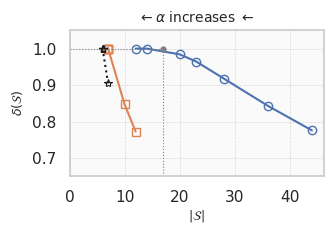

In [16]:
plt.figure(figsize=(3.5, 2.5))

delta_to_plot = []
delta_2_to_plot = []
GreedyOQC_delta_to_plot = []

num_of_nodes_to_plot = []
num_of_nodes_2_to_plot = []
GreedyOQC_num_of_nodes_to_plot = []

for i in range(len(alpha_)):
    alpha = alpha_[i]

    ### 1
    num_of_nodes = num_of_nodes_[i]
    delta_ = delta_vec_[i]
    GreedyOQC_indicator = GreedyOQC_indicator_[i]
    GreedyOQC_num_of_nodes = GreedyOQC_indicator.sum()
    GreedyOQC_delta = GreedyOQC_delta_[i]
    # ### 2
    num_of_nodes_2 = num_of_nodes_2_[i]
    delta_2_ = delta_2_vec_[i]

    delta_to_plot.append(delta_[-1])
    delta_2_to_plot.append(delta_2_[-1])
    GreedyOQC_delta_to_plot.append(GreedyOQC_delta)

    num_of_nodes_to_plot.append(num_of_nodes)
    num_of_nodes_2_to_plot.append(num_of_nodes_2)
    GreedyOQC_num_of_nodes_to_plot.append(GreedyOQC_num_of_nodes)

plt.plot(num_of_nodes_to_plot, delta_to_plot, '-o', markerfacecolor='none', label='Densest One-Hop + LL')
plt.plot(num_of_nodes_2_to_plot, delta_2_to_plot, '-s', markerfacecolor='none', label='GreedyOQC + LL')
plt.plot(GreedyOQC_num_of_nodes_to_plot, GreedyOQC_delta_to_plot, ':*', color='k', markerfacecolor='none', markeredgewidth=.8, label='GreedyOQC')

plt.vlines(omega, 0, 1, linestyles=':', color='gray', linewidth=0.8)
plt.hlines(1, 0, omega, linestyles=':', color='gray', linewidth=0.8)
plt.plot(omega, 1, '.', color='gray', markeredgewidth=1.5)


plt.title(fr'$\leftarrow \alpha$ increases $\leftarrow$', fontsize=10)
plt.xlabel(r'$|\mathcal{S}|$', fontsize=9, labelpad=2.5)
plt.ylabel(r'$\delta(\mathcal{S})$', fontsize=9, labelpad=5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# plt.legend()
# plt.legend(fontsize=10, frameon=True, bbox_to_anchor=(0.1, 1.4), loc='upper left', ncol=3)

# plt.ylim(-0.05,1.05)
# plt.ylim(0.5-0.05,1.05)
plt.ylim(0.7-0.05,1.05)
plt.xlim(0)

# plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks([0.7, 0.8, 0.9, 1.0])

plt.tight_layout()

# # Save the figure if needed
save_folder = save_source_path + 'LL_homotopy/_final/' + dataset_name + '/'
save_path = save_folder + dataset_name + '_alphas' + '_' + initialization
save_path = save_path + '_' + density_type
save_path = save_path + '_iters'+str(max_iters)+ '_delta_vs_size_3_new.pdf'

# save_folder = save_source_path + 'LL_homotopy/_final/' + dataset_name + '/'
# save_path = save_folder + 'legend.pdf'

if save_ == 1:
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    plt.savefig(save_path, format='pdf', bbox_inches='tight', dpi=300)  # Increase DPI for better quality

plt.show()


In [17]:
save_=0